In [2]:
import os
import random
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix

# Step 1: Parse the Data
def load_friends(data_dir):
    friends_dict = {}
    for filename in os.listdir(data_dir):
        if filename.endswith('.txt'):
            username = filename[:-4]
            with open(os.path.join(data_dir, filename), 'r') as file:
                friends = file.read().splitlines()
                friends_dict[username] = friends
    return friends_dict

data_dir = "data"
friends_dict = load_friends(data_dir)
print(friends_dict)

# Step 2: Create a Graph
def create_graph(friends_dict):
    G = nx.Graph()
    for user, friends in friends_dict.items():
        for friend in friends:
            G.add_edge(user, friend)
    return G

G = create_graph(friends_dict)
print("Graph created with nodes and edges:")
print(G.nodes())
print(G.edges())

# Step 3: Prepare Data for Link Prediction
def generate_samples(G, num_samples):
    positive_samples = list(G.edges())
    non_edges = list(nx.non_edges(G))
    negative_samples = random.sample(non_edges, num_samples)
    return positive_samples, negative_samples

num_samples = len(G.edges())
positive_samples, negative_samples = generate_samples(G, num_samples)
print("Number of positive samples:", len(positive_samples))
print("Number of negative samples:", len(negative_samples))

{'6_bloq': ['soberrgfx', 'dani.vfernandez', 'trippie.wism4', 'ceaese', 'andreaavaldess', 'joseephrr_', 'oyymkun', 'aaariel_xd', 'chewiuu', 'vito.x_0', 'criverasm_', 'espeee.gh', '969kingvrc', 'lil.saaku', 'misery.signal_s', '_catv._', 'golden_shawn16', 'luchoconbrocha', '_.kxuy_', '_utdbr', 'nicolas.op1', 'fabrizioleandro._.w', 'killua97.cl', 'mikaa_no', 'antesdlalluviaa', 'isma_gs1', '_.azukita._', 's0mnusss_', 'm0bvtt', 'luv.sic_fm', 'j0aqu1n_0', 'manuel_vivanco_', '__jxvii._', 'alex15_rch', 'roxbyrv', 'mariixsjjj', 'camispinachi', 'claudito_kr', '_martin.gazmuri_', 'joaquinvndress_', 'faic.exe', 'sanjose_mallingrande', 'strughnot', '_me.mento.mori_', 'deidadhypocrite', 'naniita.kamakshi', 'confesiones_enac', 'alejandra_alv1', 'nicoshelbycl', '017770.c', 'fansclub_unidos', '_unajoseterapeuta', 'akatucorazon', 'ctarsiss', 'jack_strongo', 'kyzzakkkk', 'nfasizzz', 'luceritodetu_', 'kylummi', 'souso_pt', 'madrid_renato', 'nebulosaaa.a', 'ivone._fm', 'germ4nini_', 'serho_0', '_bl4ck.kitty

In [3]:
# Step 4: Feature Engineering
def compute_features(G, samples):
    features = []
    for u, v in samples:
        # Number of common neighbors
        common_neighbors = len(list(nx.common_neighbors(G, u, v)))
        
        # Jaccard coefficient
        jaccard_coeff = list(nx.jaccard_coefficient(G, [(u, v)]))[0][2]
        
        # Adamic-Adar index
        adamic_adar_index = list(nx.adamic_adar_index(G, [(u, v)]))[0][2]
        
        # Preferential attachment
        preferential_attachment = list(nx.preferential_attachment(G, [(u, v)]))[0][2]
        
        # Resource Allocation index
        resource_allocation_index = list(nx.resource_allocation_index(G, [(u, v)]))[0][2]
        
        features.append((common_neighbors, jaccard_coeff, adamic_adar_index, 
                         preferential_attachment, resource_allocation_index))
    return features

positive_features = compute_features(G, positive_samples)
negative_features = compute_features(G, negative_samples)

# Step 5: Train a Model
# Create labels
labels = [1] * len(positive_features) + [0] * len(negative_features)
features = positive_features + negative_features

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [4]:
# Step 6: Evaluate the Model
# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_pred))

Accuracy: 0.9668826493880489
AUC Score: 0.9674396415830084


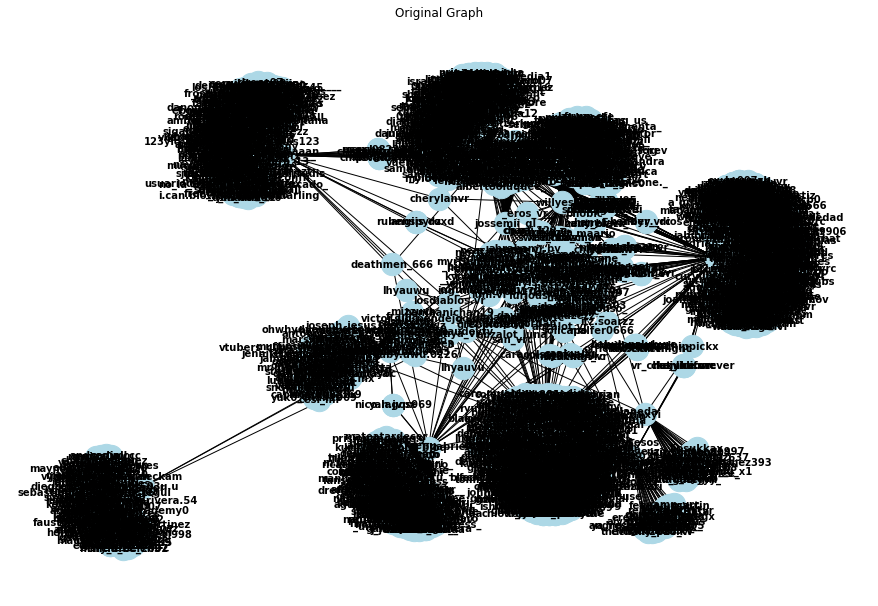

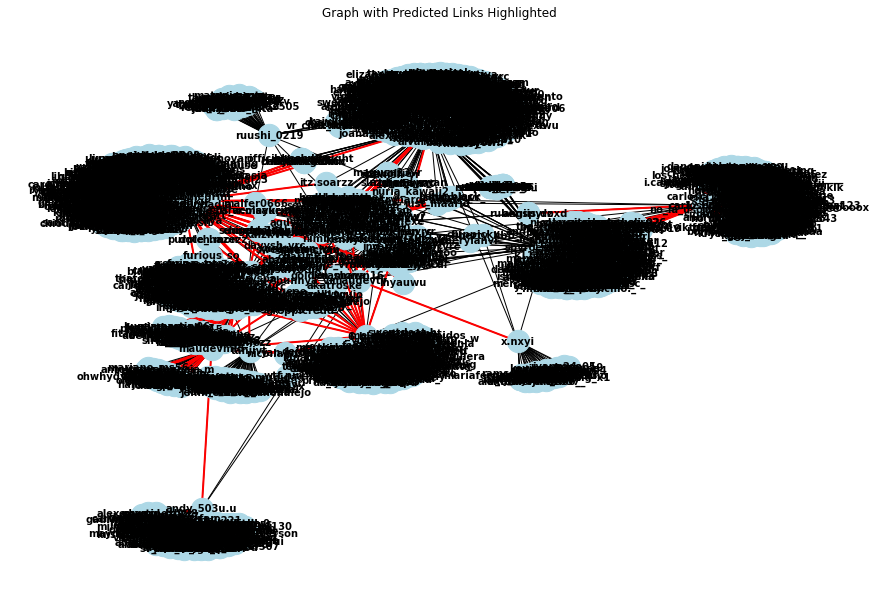

In [5]:
# Step 7: Visualize the Graph
def plot_graph(G, title, highlighted_edges=None):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_weight='bold')
    
    if highlighted_edges:
        nx.draw_networkx_edges(G, pos, edgelist=highlighted_edges, edge_color='r', width=2)
    
    plt.title(title)
    plt.show()

# Plot the original graph
plot_graph(G, "Original Graph")

# Plot the graph with predicted positive links highlighted
highlighted_edges = [(u, v) for (u, v), pred in zip(positive_samples, y_pred) if pred == 1]
plot_graph(G, "Graph with Predicted Links Highlighted", highlighted_edges)

In [6]:
# Predict probabilities for all possible edges
def predict_probabilities(model, features):
    return model.predict_proba(features)[:, 1]

all_features = compute_features(G, positive_samples + negative_samples)
predicted_probs = predict_probabilities(model, all_features)

# Display Predicted Links
def display_predicted_links(predictions, samples):
    predicted_links = [(samples[i][0], samples[i][1]) for i in range(len(predictions)) if predictions[i] > 0.5]
    return predicted_links

predicted_links = display_predicted_links(predicted_probs, positive_samples + negative_samples)
print("Predicted Links:")
for link in predicted_links:
    print(link)

Predicted Links:
('6_bloq', 'soberrgfx')
('6_bloq', 'dani.vfernandez')
('6_bloq', 'trippie.wism4')
('6_bloq', 'ceaese')
('6_bloq', 'andreaavaldess')
('6_bloq', 'joseephrr_')
('6_bloq', 'oyymkun')
('6_bloq', 'aaariel_xd')
('6_bloq', 'chewiuu')
('6_bloq', 'vito.x_0')
('6_bloq', 'criverasm_')
('6_bloq', 'espeee.gh')
('6_bloq', '969kingvrc')
('6_bloq', 'lil.saaku')
('6_bloq', 'misery.signal_s')
('6_bloq', '_catv._')
('6_bloq', 'golden_shawn16')
('6_bloq', 'luchoconbrocha')
('6_bloq', '_.kxuy_')
('6_bloq', '_utdbr')
('6_bloq', 'nicolas.op1')
('6_bloq', 'fabrizioleandro._.w')
('6_bloq', 'killua97.cl')
('6_bloq', 'mikaa_no')
('6_bloq', 'antesdlalluviaa')
('6_bloq', 'isma_gs1')
('6_bloq', '_.azukita._')
('6_bloq', 's0mnusss_')
('6_bloq', 'm0bvtt')
('6_bloq', 'luv.sic_fm')
('6_bloq', 'j0aqu1n_0')
('6_bloq', 'manuel_vivanco_')
('6_bloq', '__jxvii._')
('6_bloq', 'alex15_rch')
('6_bloq', 'roxbyrv')
('6_bloq', 'mariixsjjj')
('6_bloq', 'camispinachi')
('6_bloq', 'claudito_kr')
('6_bloq', '_martin.ga